In [1]:
# Load and Inspect the Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/order_data.csv")

# Display the first 5 rows
print(df.head())

# Show basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

  Order ID        Date        Customer Name          Product         Category  \
0  ORD1000  2025-02-23              Jo Moon           Jacket         Clothing   
1  ORD1001  2025-01-31          Lynn Mendez            Shoes         Clothing   
2  ORD1002  2025-02-13          Ebony Lynch             Milk        Groceries   
3  ORD1003  2025-03-22  Christopher Roberts           Laptop      Electronics   
4  ORD1004  2025-03-11        Karen Vasquez  Air Conditioner  Home Appliances   

   Sales Amount  Quantity  Discount (%)  Profit Region      Payment Mode  
0       1852.91         2          9.03  219.45  South  Cash on Delivery  
1       2520.90         9         17.73  441.80   West       Net Banking  
2       2043.34         3          0.10  300.05  South       Credit Card  
3       1725.83         4         11.54  293.31  South        Debit Card  
4       2968.06         9         14.49  391.80   East               UPI  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 

In [2]:
# Data Cleaning & Preprocessing

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Fill missing values (if any) - Here, we assume no missing values, but this is a general check
df.fillna(0, inplace=True)

# Remove duplicate records (if any)
df.drop_duplicates(inplace=True)

# Verify changes
print(df.info())  # Check updated column types
print("\nMissing values:\n", df.isnull().sum())  # Confirm no missing values
print("\nDuplicate records:", df.duplicated().sum())  # Confirm no duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       200 non-null    object        
 1   Date           200 non-null    datetime64[ns]
 2   Customer Name  200 non-null    object        
 3   Product        200 non-null    object        
 4   Category       200 non-null    object        
 5   Sales Amount   200 non-null    float64       
 6   Quantity       200 non-null    int64         
 7   Discount (%)   200 non-null    float64       
 8   Profit         200 non-null    float64       
 9   Region         200 non-null    object        
 10  Payment Mode   200 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 17.3+ KB
None

Missing values:
 Order ID         0
Date             0
Customer Name    0
Product          0
Category         0
Sales Amount     0
Quantity     

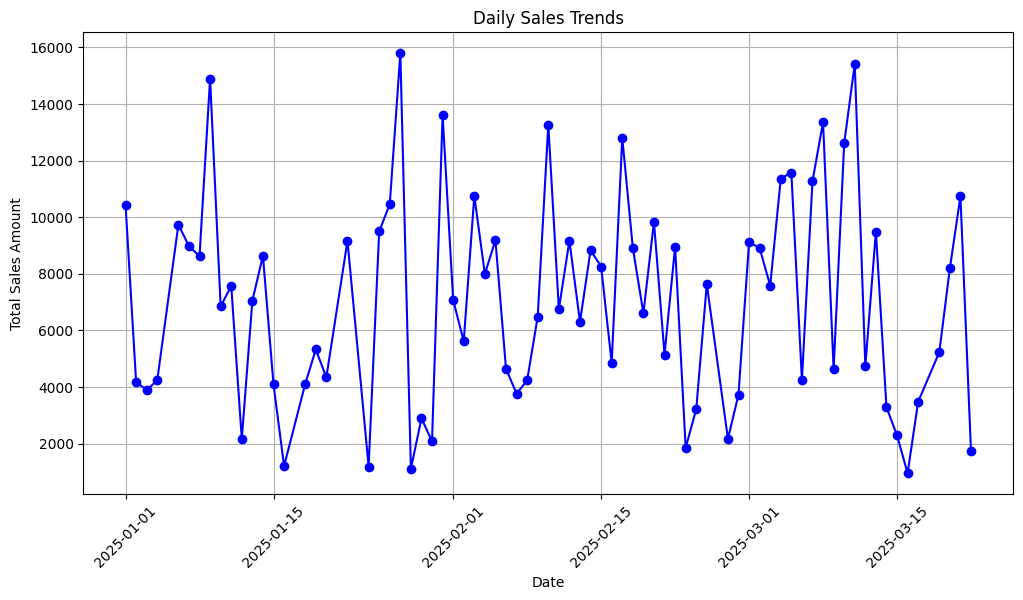

In [3]:
# Exploratory Data Analysis (EDA)

# 1: Sales Trends Over Time (Line Plot)

import matplotlib.pyplot as plt

# Aggregate sales by date
daily_sales = df.groupby("Date")["Sales Amount"].sum()

# Plot sales trends
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-4-8c19c9501749>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


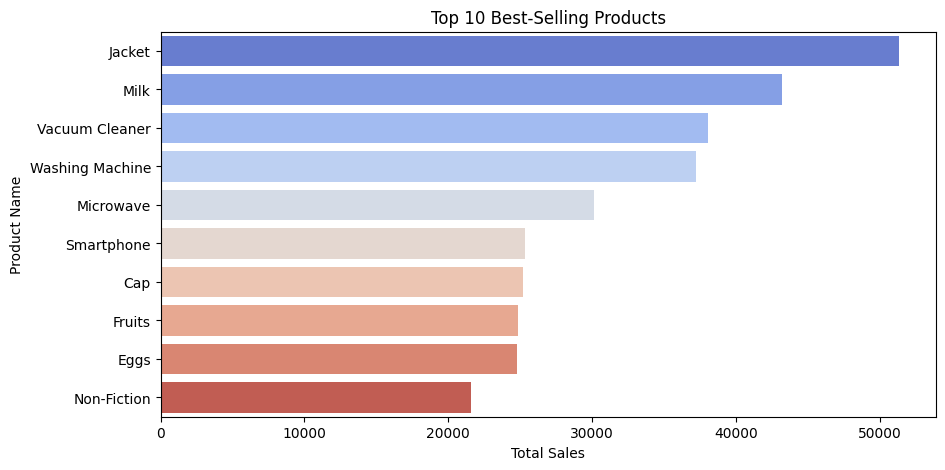

In [4]:
# 2: Top-Selling Products (Bar Chart)

import seaborn as sns

# Top 10 best-selling products
top_products = df.groupby("Product")["Sales Amount"].sum().nlargest(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


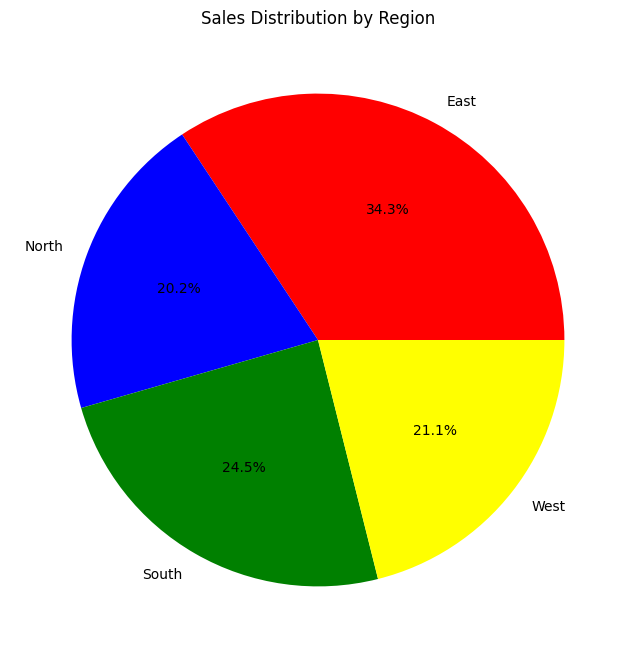

In [5]:
# 3: Sales Distribution by Region (Pie Chart)

# Sales by region
sales_by_region = df.groupby("Region")["Sales Amount"].sum()

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', colors=["red", "blue", "green", "yellow"])
plt.title("Sales Distribution by Region")
plt.show()


In [10]:
# 4: Profit vs. Discount Relationship (Scatter Plot using Plotly)

import plotly.express as px

# Scatter plot of Profit vs Discount
fig = px.scatter(df, x="Discount (%)", y="Profit", size="Sales Amount", color="Category",
                 title="Profit vs Discount Analysis", hover_data=["Product", "Sales Amount"])
fig.show()


In [11]:
# Export Data to Excel for Pivot Tables

import openpyxl

# Define file path
excel_file = "/content/order_analysis.xlsx"

# Save DataFrame to Excel
df.to_excel(excel_file, index=False)

print(f"Excel file saved: {excel_file}")


Excel file saved: /content/order_analysis.xlsx


In [12]:
# Download Excel File & Create Pivot Tables

from google.colab import files
files.download("/content/order_analysis.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Create Pivot Tables

# Google Data Studio Dashboard

